# Setup

In [1]:
from torch_harmonics.circular_harmonics import CircularHarmonics

In [2]:
L = 3
ch = CircularHarmonics(L)

# Plotting the Circular Harmonics

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from torch_harmonics import plotting

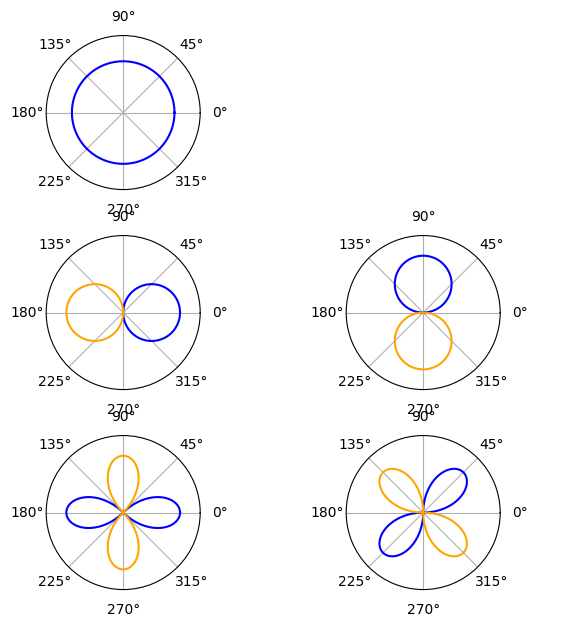

In [4]:
fig = plt.figure(figsize=(6,L*2))
subfigs = fig.subfigures(L, 2)

for l in range(L):
    for i in range(2):
        # L=0 is a scalar
        if l == 0 and i == 1:
            continue
        # L>0 has a cos and sin component
        lmax_index = max(0, 2*l - 1)
        plotting.plot_circular_fn(ch.basis_fns[lmax_index+i].numpy(), fig=subfigs[l,i], plot_neg=True)

# Circular Harmonics Transform

In [5]:
import torch
from torch import nn

In [6]:
x = torch.linspace(0,2*np.pi, 360)
#y = torch.cos(x) + 2 * torch.sin(x) + torch.cos(10*x)
y = torch.ones_like(x) * 0.323
y[:40] = 0
y[210:] = 0

<PolarAxes: >

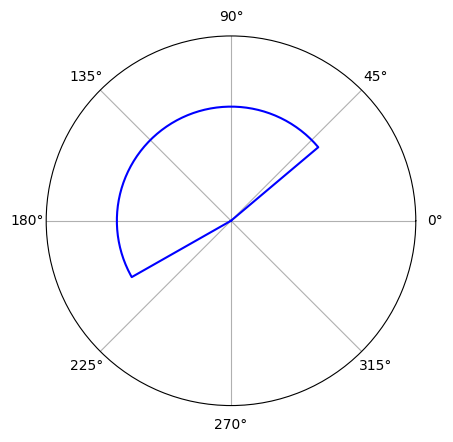

In [7]:
plotting.plot_circular_fn(y.numpy())

In [8]:
class CHT(nn.Module):
    def __init__(self, L=3, num_phi=360):
        super().__init__()
        self.w_lin = nn.Linear(num_phi, L*2-1)
        self.ch = CircularHarmonics(L)

    def forward(self, x):
        w = self.w_lin(x)
        return self.ch(w), w.detach()

In [9]:
ch_model = CHT(L)
optimizer = torch.optim.Adam(ch_model.parameters(), lr = 1e-3)

for iter in range(100):
    y_pred, _ = ch_model(y.view(1,-1))
    loss = (y_pred - y).pow(2).mean()

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if iter % 10 == 0:
        print(f'iteration: {iter} loss: {loss.item()}')

iteration: 0 loss: 0.08730971813201904
iteration: 10 loss: 0.010783947072923183
iteration: 20 loss: 0.0066791558638215065
iteration: 30 loss: 0.006600613240152597
iteration: 40 loss: 0.005014789756387472
iteration: 50 loss: 0.004950909409672022
iteration: 60 loss: 0.004949272144585848
iteration: 70 loss: 0.004889058414846659
iteration: 80 loss: 0.0048631783574819565
iteration: 90 loss: 0.004858150612562895


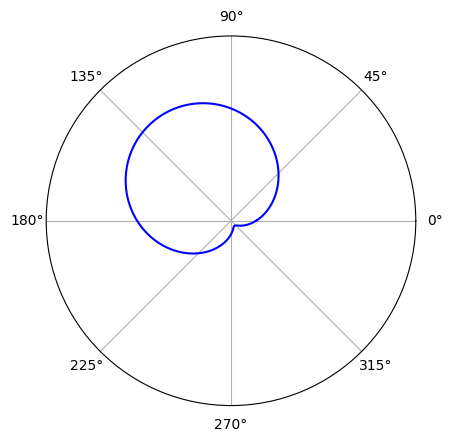

In [10]:
with torch.no_grad():
    pred, w = ch_model(y.view(1,-1))
    plotting.plot_circular_fn(pred.squeeze().numpy())

In [11]:
w_ch = ch_model.ch.basis_fns * w.T
print(w)

tensor([[ 0.3841, -0.2085,  0.2993, -0.0105, -0.0281]])


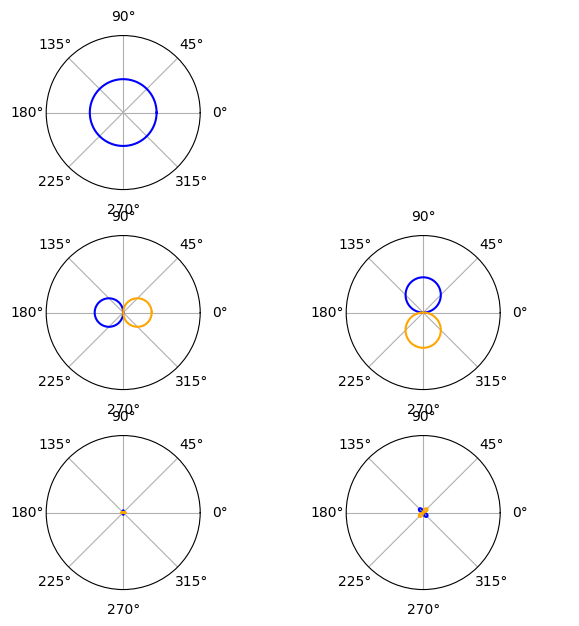

In [13]:
fig = plt.figure(figsize=(6,L*2))
subfigs = fig.subfigures(L, 2)

for l in range(L):
    for i in range(2):
        if l == 0 and i == 1:
            continue
        lmax_index = max(0, 2*l - 1)
        plotting.plot_circular_fn(w_ch[lmax_index+i].numpy(), fig=subfigs[l,i], plot_neg=True)